In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
def model_1_base(n):
    return np.random.random(n)

def model_1_anom(n):
    result = np.zeros(n)
    if np.random.random() > 0:
        pos = np.random.random() * n
        num = np.random.random() * 100
        print(pos,num)
        for i in np.arange(int(num)):
            result[int(pos)+int(i)] += np.random.random()
            
    return result

def get_model_1_data(n, r1, r2):
    return model_1_base(n) * r1 + model_1_anom(n) * r2
    

6.571062135578765 19.220239730848142


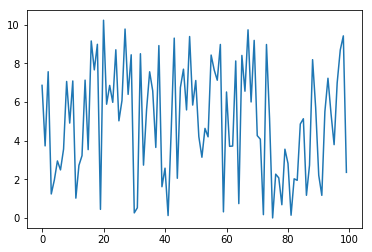

In [32]:
plt.plot(get_model_1_data(100, 10, 1))

In [76]:
def new_model(n, m):
    baseline = np.random.random(n) -0.5
    
    locs = []
    widths = []
    
    for i in range(m):
        loc = int(np.random.random() * n)
        o = int(np.random.random() * 50 + 20)
        
        locs.append(loc)
        widths.append(o)
        
        for j in range(o):
            try:
                baseline[int(loc + np.random.normal(0,5))] = np.abs(baseline[int(loc + np.random.normal(0,5))])
            except IndexError:
                pass
    
    df = pd.DataFrame([
        baseline,
        [0 if i not in locs else 1 for i in range(n)]
    ]).transpose()
    
    df.columns=['values','labels']
    
    for l,w in zip (locs,widths):
        w2 = int(w/2)
        df.loc[l-w2:l+w2,'labels'] = 1
    
    return df

In [77]:
plt.figure(figsize=(16,10))
df = new_model(1000,10)
#plt.plot(new_model(1000,10))

<Figure size 1152x720 with 0 Axes>

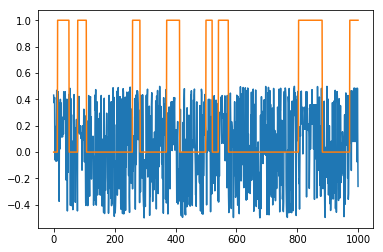

In [79]:
plt.plot(df['values'])
plt.plot(df['labels'])